# Electron charge mass ratio
# By Max Fine for PHYC11 in 2022

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# data 

# data is organizaed as matrixes of V, I, and R 
test_set = np.array([[[1, 2,3], [4,5,6]], [[7,8,9], [10,11,12]]])

data_1 = np.array([[[425, 374,476], [3.0,3.0,3.0]], [[5.5,5,6], [10,11,12]]])

data_2 = np.array([[[346, 216,242, 270,300,334,369,406,447,491], # v
                    [1.64, 1.64,1.64, 1.64,1.64,1.64,1.64,1.64,1.64,1.64]], #I
                   [[5,7,7.5,8,8.5,9,9.5,10,10.5,11,], [5,7,7.5,8,8.5,9,9.5,10,10.5,11,]]]) #r

data_3 = np.array([[[348, 348,348, 348,348,348,348,348,348,348,348,348,348], # v
                    [3.00, 2.75,2.50, 2.31,2.15,2.00,1.88,1.77,1.68,1.59,1.52,1.46,1.41]], #I
                   [[5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11], [5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11]]]) #r

data_4 = np.array([[[498, 456,415, 377,341,308,2.75,2.48,2.22], # v
                    [1.65, 1.65,1.65, 1.65,1.65,1.65,1.65,1.65,1.65]], #I
                   [[5,5.5,6,6.5,7,7.5,8,8.5,9], [5,5.5,6,6.5,7,7.5,8,8.5,9]]]) #r

data_5 = np.array([[[296,296,296,296,296,296,296,296,296,296,296,296,296], # v
                    [2.77,2.51,2.29,2.11,1.96,1.83,1.72,1.63,1.54,1.46,1.41,1.36,1.31]], #I
                   [[5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11], [5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11]]]) #r
# constant r tests
data_6 = np.array([[[309,2.79,3.06,342,380,422,459,284,256,239,208,], # v
                    [1.66,1.58,1.66,1.76,1.85,1.95,2.05,1.59,1.51,1.45,1.38]], #I
                   [[8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0], [8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0,8.0]]]) #r

data_7 = np.array([[[269,293,346,401,441,500], # v
                    [2.00,2.10,2.32,2.48,2.63,2.82]], #I
                   [[6.5,6.5,6.5,6.5,6.5,6.5], [269,293,346,401,441,500]]]) #r

data_8 = np.array([[[324,363,401,443,484,300], # v
                    [1.92,2.05,2.16,2.28,2.39,1.85]], #I
                   [[7.5,7.5,7.5,7.5,7.5,7.5], [1.92,2.05,2.16,2.28,2.39,1.85]]]) #r
# really only 7 data sets of varing length


In [3]:
values = test_set[0:,:][0,:][1]

In [4]:
values

array([4, 5, 6])

In [5]:
test_set[0:,:][1,:][0]
# organization will be v, i and r matching [0][0][0], [0][0[1] and [0] [1] [0]

array([7, 8, 9])

In [6]:
# model function example
def func(X, a, b, c):
    x,y = X
    return np.log(a) + b*np.log(x) + c*np.log(y)

# some artificially noisy data to fit
x = np.linspace(0.1,1.1,101)
y = np.linspace(1.,2., 101)
a, b, c = 10., 4., 6.
z = func((x,y), a, b, c) * 1 + np.random.random(101) / 100

# initial guesses for a,b,c:
p0 = 8., 2., 7.
print(curve_fit(func, (x,y), z, p0))

popt, pcov = curve_fit(func, (x,y), z, p0)

(array([10.04417386,  3.99956184,  6.00160302]), array([[ 1.94726518e-03,  1.03370016e-04, -3.20874421e-04],
       [ 1.03370016e-04,  5.60471727e-06, -1.69480345e-05],
       [-3.20874421e-04, -1.69480345e-05,  5.33890651e-05]]))


In [7]:
u = 1.25663706212*1e-6 # henries per meters
n = 132 # no units
a = 147.5 / 1000 # meters

def model_func(v_i, m_e):
    'returns r'
    
   # I = data[0:,:][0,:][1] # amp
   # print(I)
    v,I = v_i
    B = ((u  *n*  I) / a )* ((4/5)**3/2)
    B = 0.00079 * I
    
    #v = data[0:,:][0,:][0] # volt
    
    r = np.sqrt(2*v*m_e*(B**-2)) #/ 100 #outputs in cm
    return r # r in m

e_m = 1.75e11


e_m = 1.75e11

In [8]:
# fitting data to model 

data_sets = [1,2,3,4,5,6,7]
my_data_sets = [data_1,data_2,data_3,data_4,data_5,data_6,data_7,data_8]
popt_vals = np.zeros(len(data_sets))

data_len = np.zeros(len(data_sets))
for i in range(len(data_sets)):
    #print(i+2)
   # j = i+2
    
    my_data = my_data_sets[i]
    
    #print(my_data == data_3)
    r_values =   0.5 * (my_data[0:,:][1,:][0] / 100) #cm now in m
    v = my_data[0:,:][0,:][0]
    I = my_data[0:,:][0,:][1]
    popt, pcov = curve_fit(model_func, (v,I), r_values,)

 
    popt_vals[i] = popt[0]

    
    len_data = len(r_values)
    data_len[i]= len_data

total = np.sum(data_len)
#for i in range(len(data_sets))
#my_m_e

/tmp/ipykernel_4368/1767600454.py:16: RuntimeWarning: invalid value encountered in sqrt
  r = np.sqrt(2*v*m_e*(B**-2)) #/ 100 #outputs in cm


In [9]:
my_e_m = 1/ np.average(popt_vals)
print(my_e_m *1e-12)

0.21933681504647576


In [10]:
# getting my value of m_e

popt

array([5.07268153e-12])

In [11]:
1 / popt_vals #* 1e12

array([1.99132538e+11, 2.16405105e+11, 1.93911196e+11, 4.48493062e+11,
       1.94413339e+11, 2.14197311e+11, 1.97134394e+11])

In [12]:
 1 / e_m

5.714285714285714e-12

In [13]:
my_e_m = 1/ np.average(popt_vals)

In [14]:
errr_per = 100*(np.abs(e_m - my_e_m) / e_m )

In [15]:
errr_per

25.33532288370044

In [16]:
my_e_m * 1e-11

2.1933681504647575

/tmp/ipykernel_4368/1767600454.py:16: RuntimeWarning: divide by zero encountered in power
  r = np.sqrt(2*v*m_e*(B**-2)) #/ 100 #outputs in cm
/tmp/ipykernel_4368/1767600454.py:16: RuntimeWarning: invalid value encountered in multiply
  r = np.sqrt(2*v*m_e*(B**-2)) #/ 100 #outputs in cm


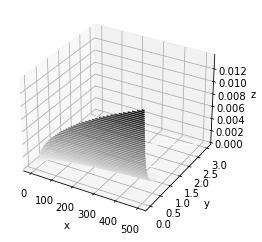

In [17]:
v_arr = np.linspace(0, 500, 50)
I_arr = np.linspace(0, 3, 50)

#X, Y = np.meshgrid(x, y)
v_arr, I_arr = np.meshgrid(v_arr, I_arr)
Z = model_func((v_arr,I_arr), my_e_m**-1)


ax = plt.axes(projection='3d')
ax.contour3D(v_arr, I_arr, Z/100, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

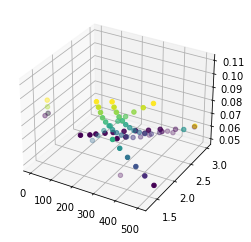

In [18]:
# plots
ax = plt.axes(projection='3d')
for i in range(len(data_sets)):
    my_data = my_data_sets[i]
    r_values = my_data[0:,:][1,:][0] / 100 #cm
    v = my_data[0:,:][0,:][0]
    I = my_data[0:,:][0,:][1]
    # Data for three-dimensional scattered points
    zdata = r_values 
    xdata = v
    ydata = I 
    ax.scatter3D(xdata, ydata, zdata, c=zdata,)# cmap='Greens');
plt.show()

(array([1]),)


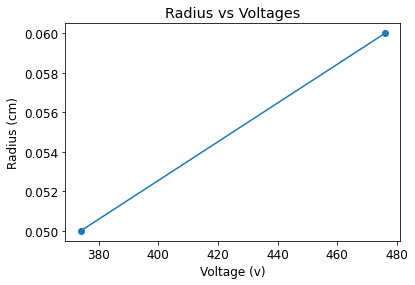

(array([0]),)


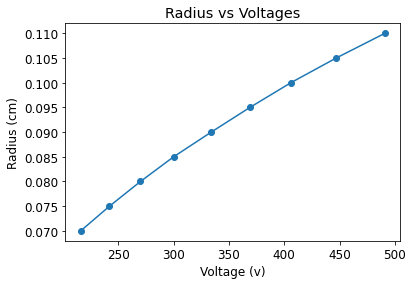

(array([0]),)


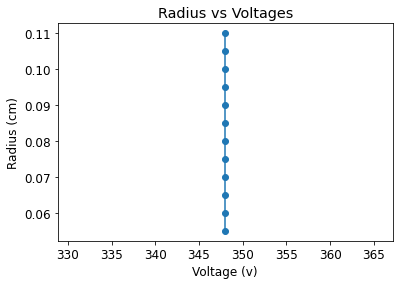

(array([0]),)


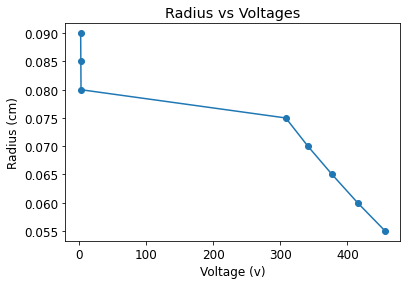

(array([0]),)


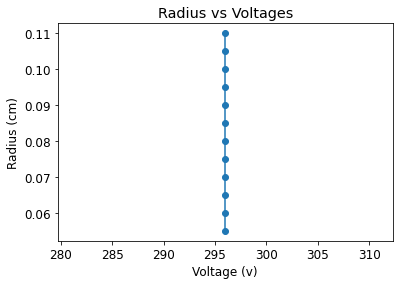

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),)


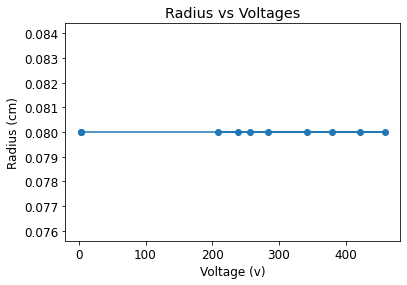

(array([0, 1, 2, 3, 4, 5]),)


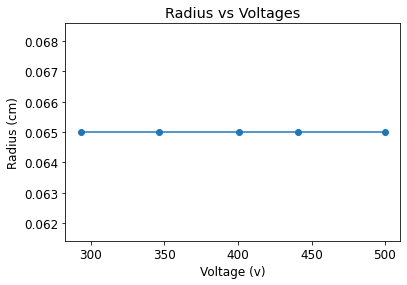

In [19]:
# plots

# Plot the measured radii of the beam path vs. the accelerating voltages. Use a least
# squares fit and find the slope and intercept.
# Plot the coil magnetic field vs. 1/r for at least one accelerating voltage. What does the
# intercept mean? Also derive an expression for e/m in terms of the slope.
#
#ax = plt.axes(projection='3d')
for i in range(len(data_sets)):
   # i = 1
    plt.rcParams.update({'font.size': 12})
    my_data = my_data_sets[i]
    r_values = my_data[0:,:][1,:][0] / 100 #cm
    v = my_data[0:,:][0,:][0]
    I = my_data[0:,:][0,:][1]
    # Data for three-dimensional scattered points
    zdata = r_values[0]
    xdata = v
    ydata = I[1:]
    index = np.where(r_values == np.min(r_values))
    print(index)
    plt.scatter(v[1:],r_values[1:])
    plt.plot(v[1:],r_values[1:])
    plt.ylabel('Radius (cm)')
    plt.xlabel('Voltage (v)')
    plt.title('Radius vs Voltages')
    plt.savefig('Radius vs Voltages_' + str(i)+'.pdf',bbox_inches='tight')
    
    plt.show()

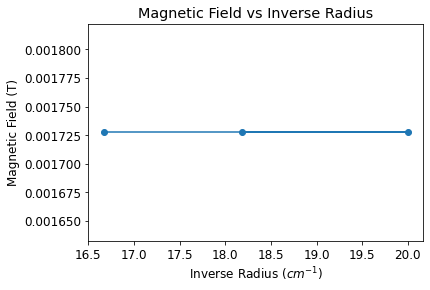

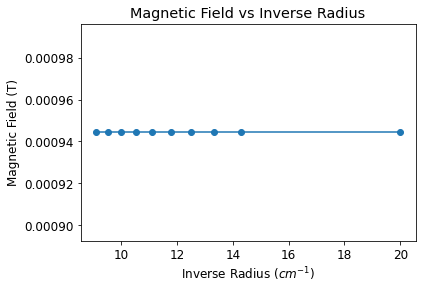

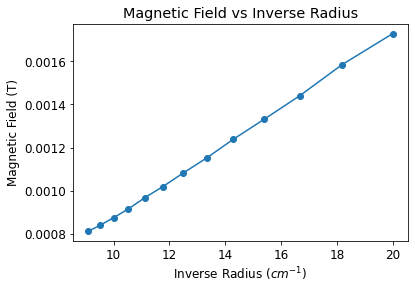

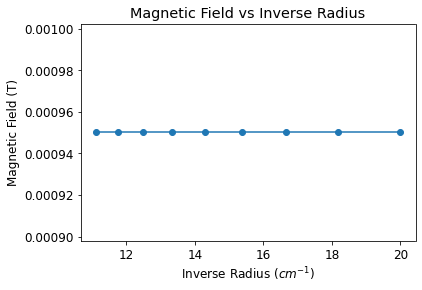

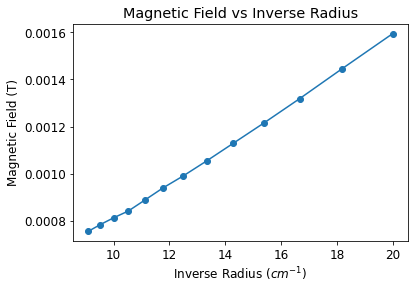

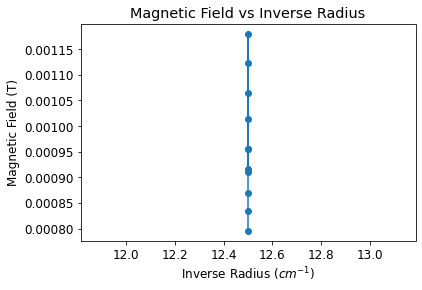

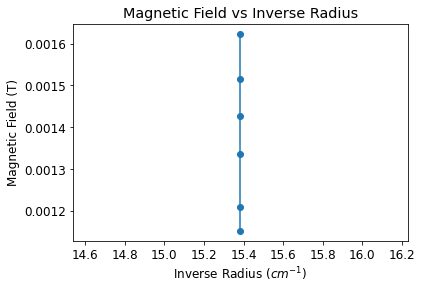

In [20]:
for i in range(len(data_sets)):
    plt.rcParams.update({'font.size': 12})
    my_data = my_data_sets[i]
    r_values = my_data[0:,:][1,:][0] / 100 #cm
    v = my_data[0:,:][0,:][0]
    I = my_data[0:,:][0,:][1]
    # Data for three-dimensional scattered points
    zdata = r_values
    xdata = v
    ydata = I 
    r = zdata
    B = ((u  *n*2 * I) / a )* ((4/5)**3/2)
    plt.scatter(1/r ,B)
    plt.plot(1/r,B)
    plt.xlabel('Inverse Radius ($cm^{-1}$)')
    plt.ylabel('Magnetic Field (T)')
    plt.title('Magnetic Field vs Inverse Radius')
            
    plt.savefig('Magnetic Field vs Inverse Radius_' + str(i)+'.pdf',bbox_inches='tight')
    plt.show()


In [21]:
my_e_m *1e-11

2.1933681504647575

In [22]:
e_m *1e-11

1.75

In [23]:
popt_vals**-1

array([1.99132538e+11, 2.16405105e+11, 1.93911196e+11, 4.48493062e+11,
       1.94413339e+11, 2.14197311e+11, 1.97134394e+11])

In [25]:
my_e_m *1e-11  *0.25


0.5483420376161894

In [ ]:
0.6 